In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
from custom_mpl_settings import load_mpl_rc
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()

No handles with labels found to put in legend.


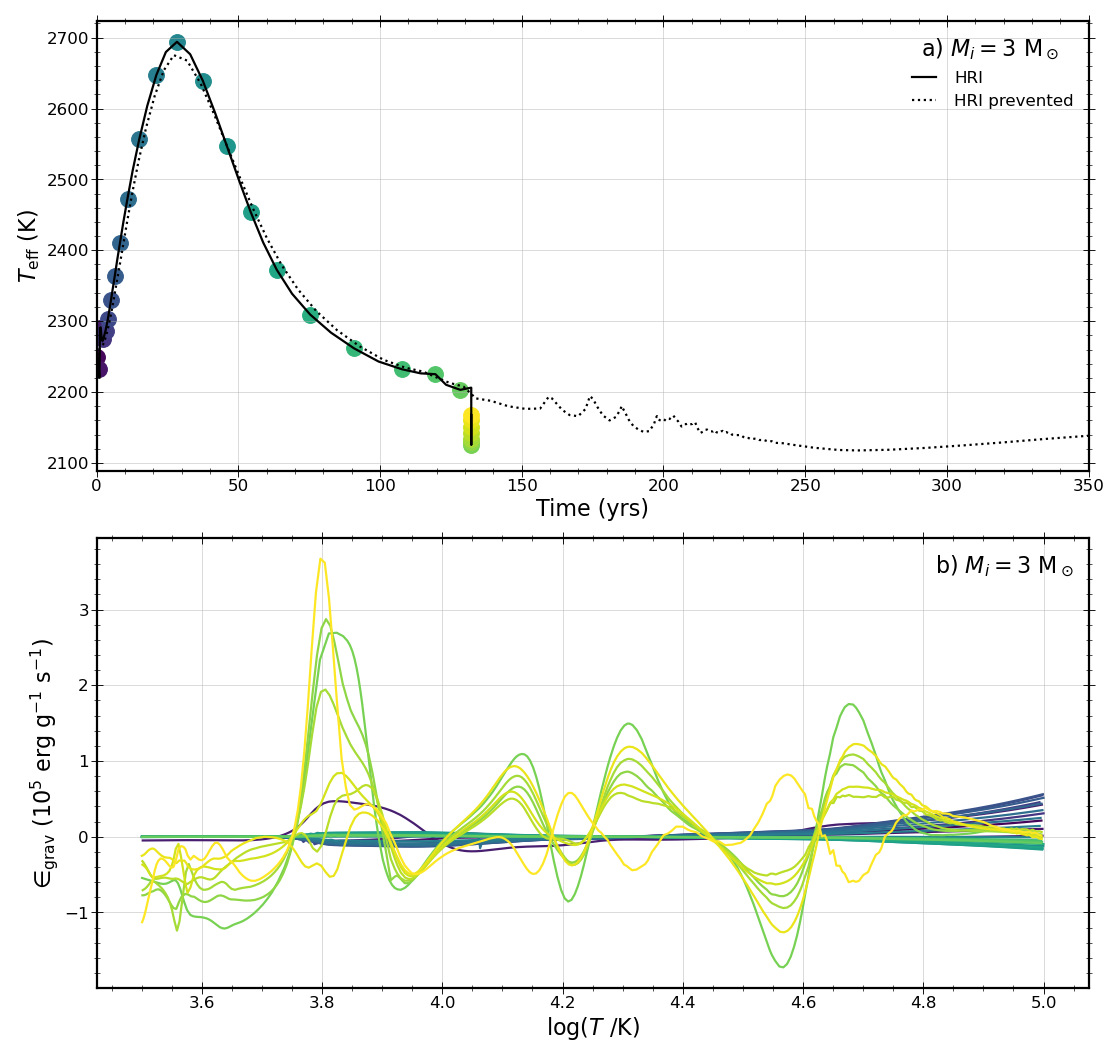

In [30]:
Tmax = 5.0
logs_folder = '/Users/natalierees/tpagb_plots/data/LOGS_3M_HRI'
profiles_index_file = os.path.join(logs_folder,'profiles.index')
df_profiles = pd.read_csv(profiles_index_file,index_col=[0],sep='\s+')

fig,ax=plt.subplots(2,1,figsize=(16,16))
m.loadHistory(logs_folder)

t0 = m.hist.star_age[0]
ax[0].plot(m.hist.star_age-t0,10**m.hist.log_Teff,c='black',ls='-',label="HRI")
m0 = m.hist.model_number[0]
delta_m = m.hist.model_number[-1]-m0

m.loadHistory('/Users/natalierees/tpagb_plots/data/LOGS_3M_HRI_prevented')
ax[0].plot(m.hist.star_age-t0,10**m.hist.log_Teff,c='black',ls=':',label="HRI prevented")

for model_number in df_profiles.index:
    m.loadProfile(logs_folder,num=int(model_number),silent=True)
    color = cmap((m.prof.model_number-m0)/delta_m)

    ax[0].scatter(m.prof.star_age-t0,m.prof.Teff,color=color,alpha=1.0,s=200)
    filter = np.where((m.prof.logT>3.5)&(m.prof.logT<Tmax))
    ax[1].plot(m.prof.logT[filter],m.prof.eps_grav_ad[filter]/1e5,c=color,alpha=1.0,ls='-')

ax[0].set_xlim(0,350)
ax[0].set(ylabel='$T_\mathrm{eff}~(\mathrm{K})$',xlabel='Time (yrs)')
ax[1].set(ylabel='$∈_\mathrm{grav}~(10^5~\mathrm{erg}~\mathrm{g}^{-1}~\mathrm{s}^{-1})$',xlabel='$\log(T~/\mathrm{K})$')

ax[0].legend(title='a) $M_i = 3~\mathrm{M}_\odot$',frameon=False)
ax[1].legend(title='b) $M_i = 3~\mathrm{M}_\odot$',frameon=False)
plt.subplots_adjust(hspace=0.15)
plt.savefig('plots/HRI_3M.jpeg',dpi=200)
plt.show()

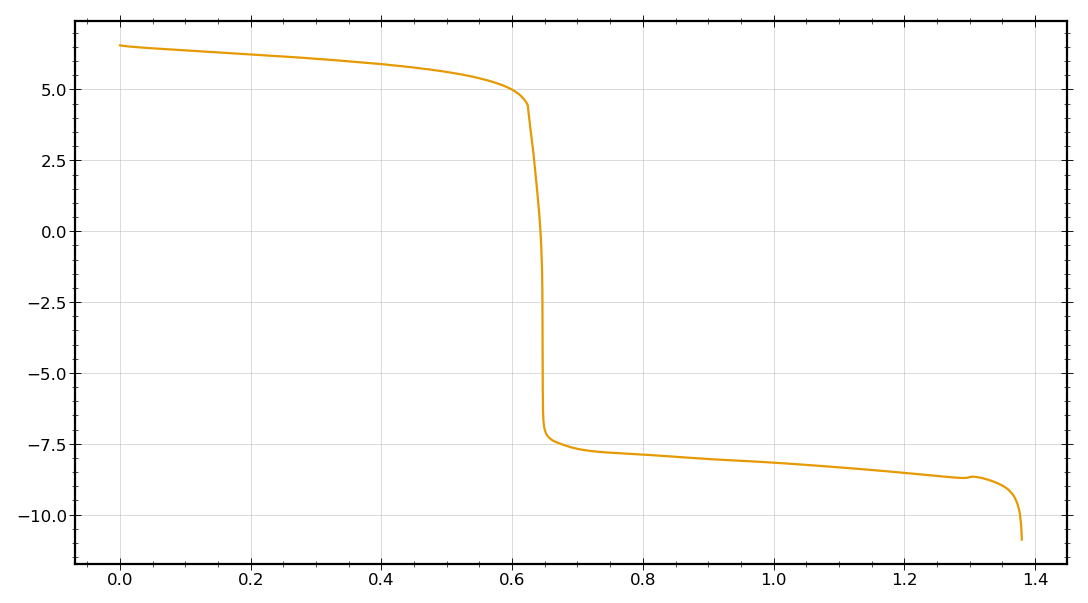

In [42]:
m.loadProfile(logs_folder,num=int(model_number),silent=True)
plt.plot(m.prof.mass,m.prof.logRho)

In [41]:
dir(m.prof.logRho)


['MESA_SDK_version',
 'Teff',
 '_loaded',
 '_mph',
 '_type',
 'alpha_mlt',
 'beta',
 'build',
 'burn_min1',
 'burn_min2',
 'center_c12',
 'center_eta',
 'center_h1',
 'center_he3',
 'center_he4',
 'center_n14',
 'center_ne20',
 'center_o16',
 'cno',
 'co_core_mass',
 'compiler',
 'data',
 'date',
 'dynamic_time',
 'eps_grav_ad',
 'eps_heat',
 'fe_core_mass',
 'he_core_mass',
 'head',
 'initial_mass',
 'initial_z',
 'kh_timescale',
 'logP',
 'logR',
 'logRho',
 'logT',
 'lsun',
 'mass',
 'math_backend',
 'model_number',
 'msun',
 'neutron_rich_core_mass',
 'nuc_timescale',
 'num_zones',
 'photosphere_L',
 'photosphere_r',
 'power_h_burn',
 'power_he_burn',
 'power_neu',
 'power_nuc_burn',
 'pp',
 'rsun',
 'star_age',
 'star_mass',
 'star_mass_c12',
 'star_mass_h1',
 'star_mass_he3',
 'star_mass_he4',
 'star_mass_n14',
 'star_mass_ne20',
 'star_mass_o16',
 'star_mdot',
 'time_seconds',
 'time_step',
 'tri_alpha',
 'version_number',
 'x_mass_fraction_H',
 'y_mass_fraction_He',
 'z_mass_fr